# 🍬第10章：Python中的文件

Python通过变量存储静态和动态数据，但变量在处理敏感数据或需要多次复用数据时可能不方便，因为它们会自我销毁以释放内存。为了解决这些问题，Python提供了文件操作功能，能够更好地与各种大小和格式的数据交互。理解文件操作并将其应用于程序中，是成为优秀Python程序员的关键。

## 🚋文件路径

在Python中，文件路径用于定位数据。路径由文件名和路径格式组成。例如，文件名为“file.pdf”的路径可能是 "C:/users/downloads/file.pdf"，其中`.pdf`是文件扩展名。不同操作系统使用不同的文件管理系统：Windows使用资源管理器，Mac使用Finder。文件按层级组织，有根目录、文件夹和子目录。

## 文件的层级结构

定位文件时，需要提供完整路径。路径层级包括根目录和子目录。例如路径 "C:/users/sample/example.pdf"中，`C:`是系统根目录，`sample`和`users`是子目录。相同文件名可能出现在不同文件夹内，因此完整路径能确保文件准确定位。

不同操作系统路径分隔符不同：Windows用反斜杠（\），Mac和Linux用正斜杠（/）。在代码中，如果不想使用反斜杠或正斜杠，可以使用Python的`os.path.join`函数来生成路径。

示例：

```python
import os

path = os.path.join('C', 'first', 'second')
print(path)
```

输出：

```
C\first\second
```

## 当前工作目录

处理复杂代码时，可能需要操作同一目录下的多个文件。此时，可以使用`os.getcwd()`函数获取当前工作目录的绝对路径，方便识别目录中的所有文件。

## 创建新文件夹

在Python编程中，经常需要自动在不同目录下生成文件夹，例如游戏保存进度时自动创建文件夹保存数据。Python提供了简单的方法通过`os.makedirs()`函数创建新文件夹。

示例代码：

```python
import os
os.makedirs('D:/user/Python/myfolder')
```

解释：
- 先导入`os`模块，该模块包含与操作系统交互的函数。
- 使用`os.makedirs()`函数，并传入目标文件夹的路径作为参数（此例中为`D:/user/Python/myfolder`）。
- 该路径表示要创建的新文件夹位置，路径和文件夹名称可以根据需求修改。

创建成功后，可以通过文件管理器打开该目录，也可以在命令行使用`cd`命令进入该目录。

注意事项：
- 给`makedirs()`函数传入的路径应为绝对路径，以确保文件夹被创建在预期位置，而不受当前工作目录影响。

总结：
掌握`os.makedirs()`函数，Python程序员可以轻松实现自动创建新文件夹的功能。

## Python 文件管理函数总结

Python 提供了一组内置函数，方便我们操作文件，包括打开、读取、写入和关闭文件。无论是在 IDE 还是终端，都能轻松使用这些功能。

### 文件打开 (open)

- 使用 `open()` 函数打开文件，需提供文件路径和模式（如读取 `'r'`、写入 `'w'`、追加 `'a'`）。
- 打开后返回文件对象，对文件的操作都是通过该对象进行。
- 对文件的修改操作需调用 `close()` 方法保存。

```python
myfile = open('D:/user/Python/example.txt')
```

### 读取文件内容 (read 和 readlines)

- `read()` 函数一次性读取文件全部内容，返回字符串。
- `readlines()` 按行读取文件内容，返回列表，每行包含换行符 `\n`。

```python
filecontent = myfile.read()
lines = myfile.readlines()
```

示例文件内容：

```
This is a Python file.
```

读取输出示例：

```python
['This is an example of a document\n', 'We are simply connecting the dots\n', ...]
```

### 写入文件内容 (write)

- 使用写入模式 `'w'` 打开文件，写入内容会覆盖原文件。
- 使用追加模式 `'a'` 打开文件，会在原文件末尾添加新内容。
- 写入完成后需调用 `close()` 保存内容。

```python
myfile = open('example.txt', 'w')
myfile.write('This is how we write to files!\n')
myfile.close()
```

追加示例：

```python
myfile = open('example.txt', 'a')
myfile.write('This is a new version')
myfile.close()
```

### 其他操作

- 读取写入操作后可以用 `read()` 验证写入内容。
- 文件复制、移动等操作可以利用 Python 的 `shutil` 库，需要先导入。

# 氛围编程与规范驱动开发
“Spec-Driven Development”（规范驱动开发）并不是一个严格统一的正式术语，但它在软件工程领域中对应的思想与多种已有的方法密切相关，其历史可以从以下几个方向理解：

---

## **1. 起源：早期软件工程与“规格先行”思想**

在 1970 年代的软件工程早期，学界与工业界就已提出“在编码之前必须先写清楚规格（Specification）”的理念。
典型代表包括：

* **瀑布模型（Waterfall Model, 1970）**：强调先需求、再规格说明，再设计与实现。
* **形式化方法（Formal Methods）**：如 Z notation、VDM，强调用数学化的规格来定义系统行为。

这些都属于最早的“规范先行”思想。

---

## **2. 2000 年代：自动化与契约式设计（Design by Contract）**

Eiffel 语言的 *Design by Contract* 思想（由 Bertrand Meyer 提出）强调：

* 明确前置条件、后置条件、不变量
* 代码需要满足这些契约

这在逻辑上也是“先定义规格，再实现”。

同时，Web API 的兴起推动了“接口优先”的实践，例如：

* **WSDL（SOAP 时代）**：先定义服务接口再实现
* **XML Schema**：先定义结构再实现系统

---

## **3. 2010 年代：API 驱动 & Schema 驱动开发成为主流**

随着 REST / microservices 的普及，“Spec-Driven Development”开始作为一种通俗术语出现，用来指：

* **先定义 API 规范（OpenAPI/Swagger）**
* 再根据规范生成代码、Mock 服务、SDK、文档

相关技术推动了它的普及：

* **Swagger / OpenAPI（2010+）**
* **GraphQL SDL（Schema Definition Language, 2015）**
* **JSON Schema（2010+）**
* **AsyncAPI（2017）**

这时期的核心理念是：

> **SPEC 是单一事实来源（Single Source of Truth）。**

---

## **4. 2020 年代：Specification-first 成为广义工程实践**

随着现代 DevOps、微服务和自动化的普及，“spec-driven development / spec-first / schema-first”成了常见术语，用来表示：

* **先写规格，再写代码**
* 使用规格自动生成：服务器框架、客户端 SDK、测试、模拟器、文档
* 适用于 API、数据模型、事件流、基础设施（IaC）、设计系统等领域

例如：

* **OpenAPI → 自动生成 REST 服务器/客户端**
* **GraphQL SDL → 自动生成 resolver scaffold**
* **AsyncAPI → 自动生成事件消费者/生产者**
* **Protobuf/IDL → gRPC 服务代码生成**

在数据工程中也出现类似理念：

* **Schema-first ETL / Data contracts**

也由此形成了更广泛的行业趋势。

---

## **Spec-Driven Development 的发展脉络**

可以概括为：

1. **1970s–1990s**：来自瀑布模型和形式化方法的“先写规格”思想
2. **2000s**：契约式设计、WSDL 等“接口优先”系统
3. **2010s**：OpenAPI / GraphQL / JSON Schema 使 spec-driven 成为主流工程实践
4. **2020s**：进入“规格即真相”的时代，API、数据、微服务全面采用 spec-first 流程



# Spec-Driven Development 和 vibe coding 的关系

---


**Spec-Driven Development 是“先写规范再写代码”，而 vibe coding 是“凭感觉写代码”。两者处于软件开发方法的两个极端：一个强调可验证性和严谨性，一个强调流畅性与创造性。**

---

# 📘 什么是 Spec-Driven Development（规范驱动开发）

Spec-Driven Development 强调：

1. **在写代码之前写详细的规范（spec）**
   包含接口、输入输出、边界情况、错误条件等。

2. **代码必须严格符合这些规范**
   代码的正确性可以通过形式化验证、契约式编程、测试推导等方式保证。

3. **典型特征：**

   * 可预测
   * 高可靠性
   * 在大型系统、关键任务软件（航空、金融、医疗）中常见
   * 更“工程化”

---

# 🎨 什么是 vibe coding

vibe coding（互联网社区术语）更像一种“开发体验哲学”：

1. **根据感觉写，边写边想，不预写严谨的规范**
2. 强调“flow state”“快速反馈”“灵感驱动”
3. 常用于：

   * 原型开发
   * 黑客马拉松
   * 创意项目
4. 核心是：**速度、灵感、迭代**

它并不是正式的软件方法论，更像是一种 *体验或工作风格*。

---

# 🔗 它们的关系：对立、互补、可以混用

可以从三个角度看两者的关系：

---

## ① **开发流程维度：两个极端**

| 方法                          | 写 spec 的位置     | 风格     |
| --------------------------- | -------------- | ------ |
| **Spec-Driven Development** | 先写完整 spec，再写代码 | 严谨、可验证 |
| **vibe coding**             | 不写 spec，边想边写   | 流畅、快速  |

它们理念相反：
**一个要求“确定性”，一个拥抱“模糊性”。**

---

## ② **使用场景维度：互补**

实际工程常用 **混合方式**：

* **早期探索 → vibe coding**（先写个 demo 找方向）
* **确定需求后 → Spec-Driven Development**（写规范、写测试、上线）

就像：

> “先画草图（vibe），再画工程图（spec）。”

---

## ③ **团队协作维度：规范与自由的配比问题**

不同团队会在 spec 和 vibe 之间找到平衡：

* 初创团队倾向 **vibe > spec**
* 大型公司倾向 **spec > vibe**
* AI-assisted coding 时代，两者更容易融合
  （AI 可以帮你从 vibe coding 自动生成 spec）

---

# 🧠 更深入的一点：

Spec-Driven Development 面向的是 **系统的正确性**
vibe coding 面向的是 **开发者的心理体验和创造性**

可以把两者看成：

* **客观正确性（objective correctness）** vs
* **主观流畅性（subjective flow）**

---

# ✔ 结论

* 两者理念不同，但不是对立阵营，可以视为**工程阶段的不同模式**
* vibe coding 注重开发体验和快速探索
* Spec-Driven Development 注重严格规范与可验证性
* 在实际项目中常常先 vibe，再 spec，也可能来回反复





---

# 🔥 AI 把软件开发从“单向流程”变成“可逆循环”

传统软件工程把规范（Spec）和代码（Code）视为：

* **规范 → 代码**（唯一正式路径）
* **代码 → 规范**（几乎不存在，文档总是过时）

AI 的出现使得两者关系彻底改变：

> **Spec ↔ Code 成为双向可逆的循环，甚至可以自我修正与自我一致。**

---

# 1️⃣ 过去：单向的“规范 → 代码”

在 AI 之前：

* 规范由人类写（需求文档、接口说明、设计图）
* 工程师依照规范手写代码
* Code → Spec 几乎不可行（文档总是消失或过时）

传统模式是一条 **单向管道**：

```
Spec ----> Code ----> (测试/运维)
```

弱点：

* 人写规范慢、易错
* 代码迭代时规范会立即失效
* 维护成本极高

---

# 2️⃣ AI 第一阶段：Spec → Code 的强化（生成式）

大模型使得 *“自然语言写规范 → 自动生成代码”* 成为现实：

* 用自然语言写 API 需求
* 用例描述 → 自动生成代码
* JSON Schema / TypeScript types → 自动生成实现
* UML / 状态机 → 代码

关键变化：

> **规范的精度可以变低，AI 会自动补全模糊细节。**

这让 **Spec→Code 变得更轻、更快、更普适**。

---

# 3️⃣ AI 第二阶段：Code → Spec 的突破（反向理解）

这是 AI 时代真正的质变。

AI 能从代码中自动提取：

* API 描述
* 输入与输出条件
* 参数含义
* 边界条件
* 错误分支与行为
* 甚至“设计意图”的推断

也能生成：

* 文档
* 注释
* 架构草图
* 逆向的 schema
* 单元测试与行为规范（Behavioral Spec）

也就是说：

> **代码第一次成为规范的来源。**

过去“文档总是过时” 在 AI 时代发生逆转：

> **AI 可以让文档永远是最新的。**

---

# 4️⃣ AI 第三阶段：Spec ↔ Code “闭环一致性”

这一阶段出现了 **自动化双向同步**：

### 🔁 AI 自动比对：

* Spec 与 Code 是否一致
* Code 的真实行为是否偏离规范
* 测试用例是否覆盖规范

### 🔁 自动修复：

* 如果代码偏离 spec → AI 重新实现
* 如果 spec 过时 → AI 自动更新 spec
* 如果测试不一致 → AI 自动补全或修复测试

最终构成闭环：

```
Spec ←→ Code ←→ Tests
           ↑       ↓
         Running Results
```

规范、代码、测试三者 **自动保持一致**。

这是传统开发做不到的。

---

# 5️⃣ AI 时代新出现的两种工作流

## 🌟 A. “代码 → 规范 → 更干净的代码”

这是 vibe coding 自然演化为正式工程的流程：

1. 先写 vibe code 草稿
2. AI 提取正式规范
3. AI 按规范生成“整洁实现”
4. diff 两者，自动修正不一致之处

这意味着：

> **你可以先随意写，再工程化。**

---

## 🌟 B. “规范 → 代码 → 自动更新规范”

这是 Spec-Driven Development 变得动态化：

1. 写粗略业务描述 / 接口草图
2. AI 生成正式规范（schema + constraints）
3. AI 生成代码
4. 每次改代码时 AI 自动更新规范

这意味着：

> **规范永不过时，因为它由代码反向驱动更新。**

---

# 6️⃣ 本质演化：规范从静态“文档”变成动态“语义系统”

传统规范是：

* 静态
* 手写
* 容易过时

AI 时代的规范是：

* 从代码反推
* 从示例归纳
* 从自然语言推理
* 可执行（schema / contract）
* 自动自洽
* 动态维护

它从文档变成了：

> **一个活的、可解释的、语义化的 artifact。**

---

# 7️⃣ 结论：AI 让开发从“工程活动”变成“语义对话”

💡 **过去：开发 = 按规范写代码**
💡 **现在：开发 = 用意图驱动 AI 生成规范与代码**
💡 **未来：开发 = 系统会自己保持规范与实现的一致性**

开发者的角色转变为：

* 描述意图
* 给示例
* 决策版本
* 监督自动协同

而 AI 负责：

* 补全
* 推导
* 同步
* 实现
* 验证

这是软件工程几十年来最大的范式转换。

---


我们继续更深入地展开，从**工程实践、认知模式、AI 开发趋势、以及工作流融合**四个维度，把 *Spec-Driven Development* 和 *vibe coding* 的关系讲得更体系化、更前沿。

---

# 1️⃣ 工程实践：两种模式在“真实软件开发”中的互动

软件开发从来不是线性的，而是循环式的：

```
探索（Exploration）→ 明确（Clarification）→ 实现（Implementation）→ 迭代（Refinement）
```

两种方法分别对应不同环节：

| 开发阶段                  | 更适用的方法                                        |
| --------------------- | --------------------------------------------- |
| **探索（探索是否可行）**        | vibe coding                                   |
| **明确（整理需求、API、边界条件）** | Spec-Driven Development                       |
| **实现（编码 + 验证）**       | Spec-Driven Development 为主，但带有 vibe coding 风格 |
| **迭代（优化、重构、试验）**      | vibe coding                                   |

所以在真实项目中：

> **“Spec vs Vibe” 不是二选一，而是一个循环。**

而成熟开发者的标志恰恰是知道什么时候切换模式。

---

# 2️⃣ 认知模式：两者反映的是人脑两种思维系统

可以映射到心理学的 **双系统理论（System 1 / System 2）**：

| 思维系统             | 对应方法                    | 特征           |
| ---------------- | ----------------------- | ------------ |
| **System 1（直觉）** | vibe coding             | 快速、模糊、创造性、发散 |
| **System 2（分析）** | Spec-Driven Development | 缓慢、严谨、结构化、收敛 |

最强的工程能力来自两者协作：

* **vibe coding 提供“灵感、速度、试错空间”**
* **Spec-Driven Development 提供“结构、可靠性、可验证性”**

把它类比成：

> vibe coding 是“画草图”，
> Spec-Driven Development 是“画施工图”。

---

# 3️⃣ AI 时代：两者正在自然融合

这是最近几年很关键的趋势：

### 🧩 传统时代

* 先写 spec（人写）
* 再写代码（人写）

### 🤖 AI 时代

* vibe coding → AI 自动扩展想法
* AI 可以根据“vibe code” 自动生成：

  * API 规范
  * 类型定义
  * 边界条件
  * 测试
  * 文档

即：

> **AI 把 vibe coding 的产物补充成 spec。**

同样：

* 如果你先写 spec，AI 可以自动生成符合 spec 的代码。

AI 变成了两者之间的“翻译器”。

这使得：

> **vibe coding 和 Spec-Driven Development 可以自然地相互转化，而不是互斥。**

---

# 4️⃣ 实际工作流：一个“结合两者”的现代工作流示例

下面是一个非常实用的流程，很多顶尖团队现在就是这么干的。

---

## 🔄 step 1：vibe coding 草稿（探索）

你先写：

* 调用方式示例
* 大致结构
* 几个可能的输入输出
* 一个工作原型

把你的“想法”粗略放到代码里。

---

## 🔄 step 2：AI 自动生成 spec（明确）

让 AI 基于你的 vibe code：

* 自动提取 API 规范
* 补全前置条件、后置条件
* 列出边界用例
* 生成类型定义或 schema（GraphQL / JSON Schema / TypeScript）
* 给出测试规范（not tests yet）

---

## 🔄 step 3：Spec → 代码（实现）

然后要求 AI 严格按 spec 生成最终代码。
此时 vibe code 只是“输入灵感”，不进入最终版本。

---

## 🔄 step 4：迭代 / 探索 → 再 vibe

如果发现设计问题，需要扩展功能：

* 回到 vibe coding 修改 demo
* 让 AI 再提取一次新的 spec
* 再生成正式实现

形成循环。

---

# 5️⃣ 关系的本质：

## ✨ Spec-Driven Development 是“控制论式”

## ✨ vibe coding 是“创造性探索”

它们分别解决不同的问题：

| 问题            | 对应方法                    |
| ------------- | ----------------------- |
| “我想做什么？方向对吗？” | vibe coding             |
| “我要怎样确保正确？”   | Spec-Driven Development |

所以关系可以描述为：

> **vibe coding 解锁可能性，spec-driven 开发锁定正确性。**

---




# **[Spec-Kit](https://github.com/github/spec-kit) 简要介绍**

Spec-Kit 是一套用于规范化项目开发流程的工具包，旨在帮助团队快速制定、管理并维护技术规范与项目文档。它通常包含模板、示例、最佳实践指南以及自动化脚本，使开发者在需求分析、接口定义、架构设计和测试等环节保持一致性与高效率。


---
## 核心组件

- **Specify CLI**


是整个系统的核心命令行工具，负责项目初始化、模板管理和工作流协调。它支持多种AI编程助手，包括Claude Code、GitHub Copilot、Gemini CLI

等。

- **项目宪法** 

定义了开发的基本原则和约束，确保所有生成的代码都符合团队的标准和最佳实践。宪法包含九个核心条款，涵盖了从库优先到测试驱动的各个方面。

- **模板系统**

提供了结构化的文档模板，包括规格模板、计划模板和任务模板。这些模板通过精心设计的约束条件，引导AI生成高质量、一致性强的文档。

- **记忆存储**

系统保存了项目的所有规格、计划和实施记录，为后续的迭代和维护提供完整的上下文信息。

## 核心特性
- **多AI平台支持**

Spec Kit 支持市面上主流的AI编程助手，包括Claude Code、GitHub Copilot、Gemini CLI、Cursor、Qwen Code等，为开发者提供了灵活的选择。


- **结构化开发流程**

通过五个核心命令（/constitution、/specify、/clarify、/plan、/tasks、/implement），Spec Kit将开发过程标准化，确保每个项目都遵循相同的最佳实践。
- **模板驱动的质量保证**

精心设计的模板确保了生成的规格文档和技术方案的完整性和一致性。模板通过约束条件引导AI输出，避免了常见的过度设计和遗漏问题。


- **自动化工作流**

从项目初始化到代码生成，Spec Kit提供了自动化的工作流支持，大大减少了手动操作和重复性工作。


- **版本控制集成**

Spec Kit与Git深度集成，每个功能都在独立的分支中开发，支持标准的Pull Request工作流。


- **实时反馈循环**

通过测试驱动开发和持续验证，Spec Kit确保生成的代码符合规格要求，并能快速发现和修复问题。


## 适用场景

- **新产品开发（Greenfield）**

对于从零开始的新项目，Spec Kit能够快速建立完整的开发框架，让团队专注于业务逻辑的实现。


- **系统现代化改造（Brownfield）**

对于现有的遗留系统，Spec Kit可以帮助逐步重构，通过规格驱动的方式保持系统的稳定性和可维护性。


- **快速原型开发**

当需要快速验证产品概念时，Spec Kit能够大幅缩短从想法到可运行原型的时间。


- **团队技能提升**

对于经验不足的开发团队，Spec Kit提供了一套完整的开发最佳实践，有助于提升整体的工程能力。


- **多技术栈并行开发**

当需要用不同技术栈实现相同功能时，规格驱动开发能够确保不同实现的一致性和质量。





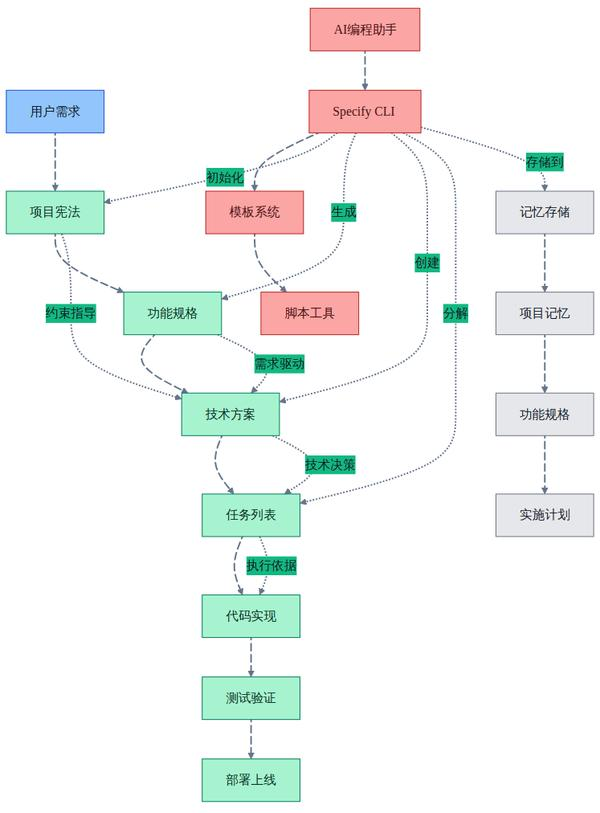



---

# 🐍 Python 项目作业：文件管理器 `file_manager.py`🎶

## 📌 项目目标

本项目旨在练习 Python 中的文件与文件夹操作、循环处理、文本读写等基础技能。你将创建一个简单的“文件管理器”，用于批量生成文本文件、写入内容、读取内容，并生成汇总表格。

---

## 📁 作业要求

### 1. 创建 Python 脚本

创建一个新的 Python 文件，命名为：

```
file_manager.py
```

---

### 2. 实现以下功能：

#### **① 创建文件夹**

在当前目录下创建一个名为 `data` 的文件夹。

---

#### **② 创建文本文件**

在 `data` 文件夹中创建 **5 个文本文件**，分别命名为：

```
file1.txt
file2.txt
file3.txt
file4.txt
file5.txt
```

---

#### **③ 写入表格数据**

为每个文本文件写入一个包含三列的表格：

| 编号 | 名称 | 描述 |
| -- | -- | -- |

要求：

* 每个文件写入多行虚拟数据（例如：编号从 1 开始递增）
* 内容格式可以使用逗号分隔、制表符分隔，或任意可读格式

---

#### **④ 读取并打印文件内容**

使用循环依次读取每个文件：

* 在控制台打印文件名作为标题
* 再打印文件内容

示例输出格式：

```
=== file1.txt ===
编号: 1, 名称: item1, 描述: description1
编号: 2, 名称: item2, 描述: description2
...
```

---

#### **⑤ 提取名称列并生成汇总表**

从每个文件中读取“名称”列的内容，并将所有名称写入一个新的表格，以以下格式保存：

```
summary.txt
```

示例内容：

```
名称
item1
item2
item3
...
```

---

## 🎯 最终成果

你应提交：

* `file_manager.py`（Python 脚本）
* 自动生成的 `data` 文件夹及其中的文本文件
* 脚本自动生成的 `summary.txt`
